Đang ở trong Google Colab. Vui lòng tải lên tệp coin_Bitcoin.csv của bạn.


Saving Bitcoin.csv to Bitcoin (1).csv
Không tìm thấy tệp 'coin_Bitcoin.csv' trong các tệp đã tải lên. Sử dụng tệp đầu tiên.
5 dòng dữ liệu đầu tiên của chuỗi thời gian (Close):
Date
2018-12-31    3742.700335
2018-12-30    3865.952577
2018-12-29    3820.408682
2018-12-28    3923.918594
2018-12-27    3654.833539
Name: Close, dtype: float64

Tổng số điểm dữ liệu: 1943


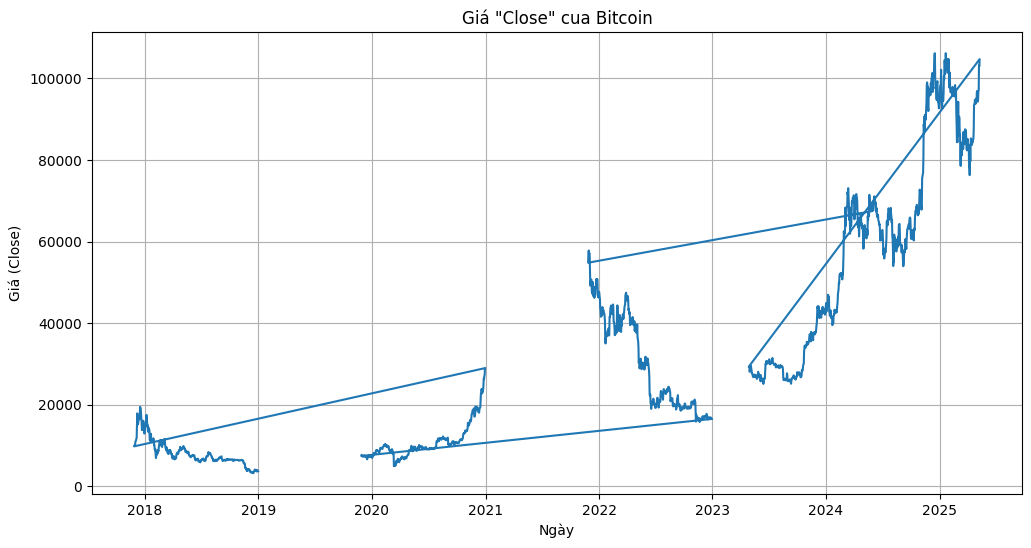

Kích thước tập huấn luyện: 1554
Kích thước tập kiểm tra: 389


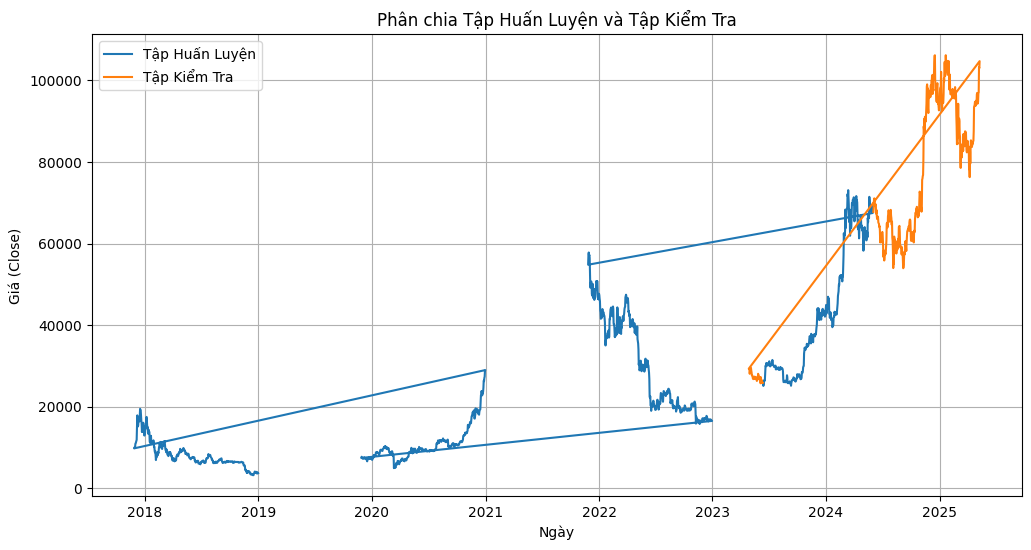

Kiểm tra tính dừng (ADF Test) trên dữ liệu huấn luyện:
ADF Statistic: -1.424572098114589
p-value: 0.5704409142525646
Critical Values:
	1%: -3.43457045663604
	5%: -2.8634040752034995
	10%: -2.567762403300696

P-value > 0.05: Chuỗi thời gian có khả năng không dừng. Cần sai phân (differencing).

Đang vẽ ACF/PACF trên dữ liệu đã sai phân bậc 1.


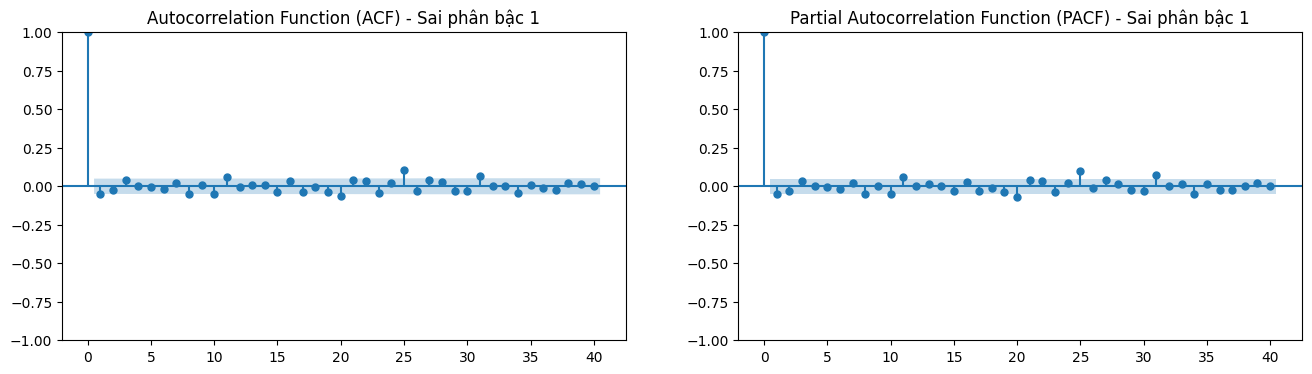


--- Hướng dẫn chọn p, d, q ---
d: Số lần sai phân cần thiết để chuỗi trở nên dừng. Thường là 0, 1, hoặc 2.
   Nếu ADF test cho p-value > 0.05, thử d=1. Nếu vẫn chưa dừng, thử d=2.
p: Bậc của thành phần tự hồi quy (AR). Nhìn vào PACF:
   Nếu PACF tắt (cut off) đột ngột sau k độ trễ, thì p=k.
q: Bậc của thành phần trung bình trượt (MA). Nhìn vào ACF:
   Nếu ACF tắt (cut off) đột ngột sau k độ trễ, thì q=k.
Nếu cả ACF và PACF giảm dần, có thể cần mô hình ARMA(p,q) phức tạp hơn hoặc ARIMA.
Lưu ý: Việc chọn p,d,q thủ công có thể khó. Thư viện `pmdarima` có hàm `auto_arima` có thể tự động tìm tham số tốt.

Tham số ARIMA được chọn (ví dụ): order=(5, 1, 0)
Lưu ý: Tham số p=5 và q=0 chỉ là ví dụ. Bạn nên phân tích ACF/PACF của chuỗi (đã sai phân nếu d>0) để chọn p, q tốt hơn.
Bắt đầu huấn luyện ARIMA với order=(5, 1, 0) và dự đoán trên tập test...


<ipython-input-2-2ee36b5b6973>:155: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test_data[t]


Đã dự đoán 50/389 điểm
Đã dự đoán 100/389 điểm
Đã dự đoán 150/389 điểm
Đã dự đoán 200/389 điểm
Đã dự đoán 250/389 điểm
Đã dự đoán 300/389 điểm
Đã dự đoán 350/389 điểm
Đã dự đoán 389/389 điểm
Hoàn thành dự đoán.

Chỉ số đánh giá trên tập Test:
RMSE: 4341.152
MAE: 1577.941
MAPE: 2.05% (Mean Absolute Percentage Error)
R-squared: 0.963

Bảng so sánh giá trị Thực tế và Dự đoán (5 dòng đầu):
            Thực tế (Actual)  Dự đoán (Predicted)
Date                                             
2023-06-12      25902.499870         25860.885875
2023-06-11      25940.168080         25863.498980
2023-06-10      25851.241003         25967.464210
2023-06-09      26480.375094         25857.713181
2023-06-08      26508.215902         26450.139744

Bảng so sánh giá trị Thực tế và Dự đoán (5 dòng cuối):
            Thực tế (Actual)  Dự đoán (Predicted)
Date                                             
2024-06-06      70757.165852         69332.777544
2024-06-05      71082.822704         70671.303033
2024-

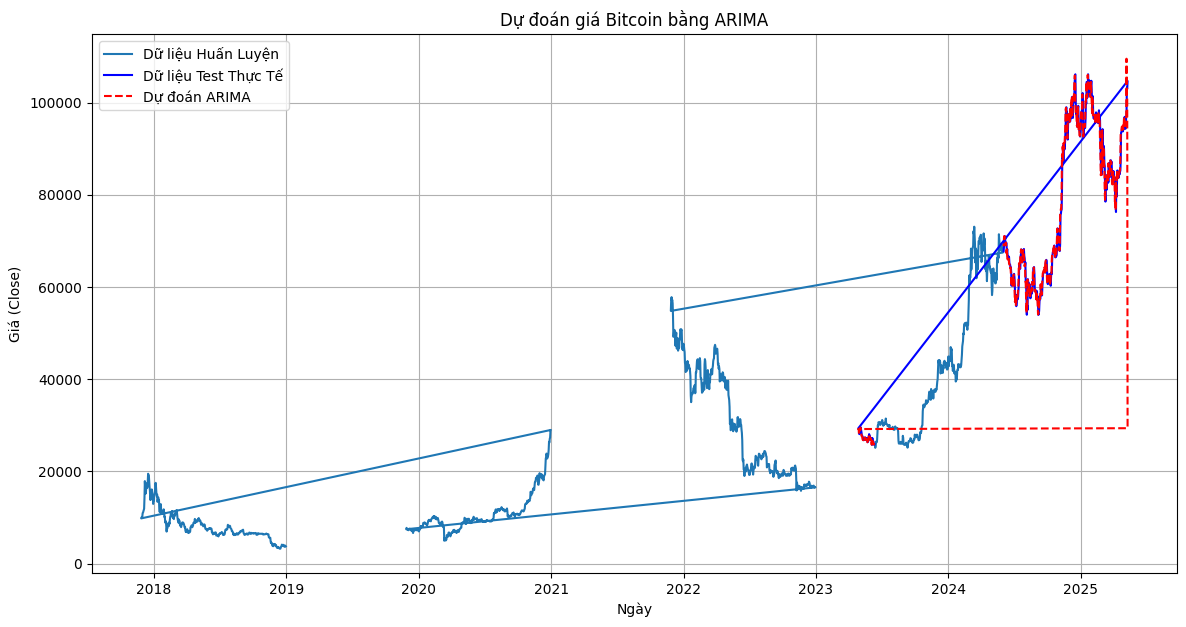

In [2]:
# -*- coding: utf-8 -*-
"""
Hệ hỗ trợ quyết định, dự đoán giá của tiền điện tử (Predict the price of cryptocurrencies)
Chạy ARIMA trên dữ liệu coin_Bitcoin.csv
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Đã có r2_score
import io # Để đọc nội dung tệp được tải lên

# Chỉ dành cho Google Colab: Tải tệp lên
try:
    from google.colab import files
    print("Đang ở trong Google Colab. Vui lòng tải lên tệp coin_Bitcoin.csv của bạn.")
    uploaded = files.upload()
    # Đảm bảo rằng tên tệp được tải lên là 'coin_Bitcoin.csv' hoặc lấy tên tệp đầu tiên
    file_name = 'coin_Bitcoin.csv'
    if file_name not in uploaded:
        print(f"Không tìm thấy tệp '{file_name}' trong các tệp đã tải lên. Sử dụng tệp đầu tiên.")
        file_name = list(uploaded.keys())[0]
    csv_file_path = io.BytesIO(uploaded[file_name])
except ImportError:
    print("Không ở trong Google Colab. Đảm bảo tệp 'coin_Bitcoin.csv' ở cùng thư mục với notebook.")
    print("Hoặc thay đổi 'csv_file_path' thành đường dẫn chính xác đến tệp của bạn.")
    csv_file_path = '/content/coin_Bitcoin.csv' # << THAY ĐỔI NẾU CẦN

# Đọc dữ liệu từ coin_Bitcoin.csv
# coin_Bitcoin.csv không có dòng thứ hai cần bỏ qua.
try:
    df = pd.read_csv(csv_file_path, delimiter =';')
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy tệp tại '{csv_file_path}'. Vui lòng kiểm tra đường dẫn.")
    # Dừng thực thi nếu không tìm thấy tệp
    raise

# Chuyển đổi cột 'Date' sang định dạng datetime và đặt làm chỉ mục
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Chọn cột 'Close' để dự đoán (thay vì 'target')
# Cột 'Close' là giá đóng cửa, phù hợp để dự đoán.
ts_data = df['Close'].copy()

# Loại bỏ các giá trị NaN (nếu có)
ts_data.dropna(inplace=True)

print("5 dòng dữ liệu đầu tiên của chuỗi thời gian (Close):")
print(ts_data.head())
print(f"\nTổng số điểm dữ liệu: {len(ts_data)}")

# Vẽ biểu đồ chuỗi thời gian gốc
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('Giá "Close" cua Bitcoin') # Thay đổi tiêu đề
plt.xlabel('Ngày')
plt.ylabel('Giá (Close)') # Thay đổi nhãn
plt.grid(True)
plt.show()

# Chia dữ liệu: 80% cho huấn luyện, 20% cho kiểm tra
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[0:train_size], ts_data[train_size:len(ts_data)]

print(f"Kích thước tập huấn luyện: {len(train_data)}")
print(f"Kích thước tập kiểm tra: {len(test_data)}")

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Tập Huấn Luyện')
plt.plot(test_data.index, test_data, label='Tập Kiểm Tra')
plt.title('Phân chia Tập Huấn Luyện và Tập Kiểm Tra')
plt.xlabel('Ngày')
plt.ylabel('Giá (Close)') # Thay đổi nhãn
plt.legend()
plt.grid(True)
plt.show()

# Kiểm tra tính dừng của dữ liệu huấn luyện bằng ADF test
print("Kiểm tra tính dừng (ADF Test) trên dữ liệu huấn luyện:")
adf_result = adfuller(train_data)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

if adf_result[1] > 0.05:
    print("\nP-value > 0.05: Chuỗi thời gian có khả năng không dừng. Cần sai phân (differencing).")
else:
    print("\nP-value <= 0.05: Chuỗi thời gian có khả năng dừng.")

# Vẽ biểu đồ ACF và PACF để giúp xác định p và q
# Nếu chuỗi không dừng, chúng ta nên vẽ ACF/PACF trên dữ liệu đã sai phân.
# Giả sử chúng ta cần 1 lần sai phân (d=1) nếu ADF test cho thấy không dừng
if adf_result[1] > 0.05:
    train_data_diff = train_data.diff().dropna()
    print("\nĐang vẽ ACF/PACF trên dữ liệu đã sai phân bậc 1.")
else:
    # Nếu chuỗi đã dừng, có thể xem xét ACF/PACF trên dữ liệu gốc hoặc vẫn thử sai phân
    # Để nhất quán với hướng dẫn, ta vẫn có thể xem xét sai phân bậc 1
    # Hoặc, bạn có thể quyết định d=0 và vẽ ACF/PACF trên train_data gốc
    train_data_diff = train_data.diff().dropna() # Vẫn vẽ trên sai phân để xem
    print("\nChuỗi có vẻ dừng, nhưng vẫn vẽ ACF/PACF trên sai phân bậc 1 để tham khảo.")


fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train_data_diff, ax=axes[0], lags=40, title='Autocorrelation Function (ACF) - Sai phân bậc 1')
plot_pacf(train_data_diff, ax=axes[1], lags=40, title='Partial Autocorrelation Function (PACF) - Sai phân bậc 1')
plt.show()

print("\n--- Hướng dẫn chọn p, d, q ---")
print("d: Số lần sai phân cần thiết để chuỗi trở nên dừng. Thường là 0, 1, hoặc 2.")
print("   Nếu ADF test cho p-value > 0.05, thử d=1. Nếu vẫn chưa dừng, thử d=2.")
print("p: Bậc của thành phần tự hồi quy (AR). Nhìn vào PACF:")
print("   Nếu PACF tắt (cut off) đột ngột sau k độ trễ, thì p=k.")
print("q: Bậc của thành phần trung bình trượt (MA). Nhìn vào ACF:")
print("   Nếu ACF tắt (cut off) đột ngột sau k độ trễ, thì q=k.")
print("Nếu cả ACF và PACF giảm dần, có thể cần mô hình ARMA(p,q) phức tạp hơn hoặc ARIMA.")
print("Lưu ý: Việc chọn p,d,q thủ công có thể khó. Thư viện `pmdarima` có hàm `auto_arima` có thể tự động tìm tham số tốt.")

# Chọn tham số (p, d, q) cho mô hình ARIMA
# Dựa trên phân tích ở trên hoặc thử nghiệm. Ví dụ: (5,1,0)
# p: bậc AR, d: bậc sai phân, q: bậc MA
# Nếu chuỗi ban đầu đã dừng (p-value ADF < 0.05), bạn có thể thử d=0.
# Nếu không, d=1 là một lựa chọn phổ biến.
# p và q có thể chọn dựa trên ACF/PACF, ví dụ p=5, q=0.

# Dựa vào ADF test, nếu p-value > 0.05, d nên là 1 hoặc 2. Nếu <= 0.05, d có thể là 0.
# Với dữ liệu giá Bitcoin, thường không dừng, nên d=1 là một khởi đầu tốt.
d_param = 1 if adf_result[1] > 0.05 else 0 # Gợi ý d dựa trên ADF test
# Giữ p=5, q=0 như ví dụ gốc, nhưng bạn nên điều chỉnh dựa trên ACF/PACF
order = (5, d_param, 0)
print(f"\nTham số ARIMA được chọn (ví dụ): order={order}")
print(f"Lưu ý: Tham số p={order[0]} và q={order[2]} chỉ là ví dụ. Bạn nên phân tích ACF/PACF của chuỗi (đã sai phân nếu d>0) để chọn p, q tốt hơn.")


history = [x for x in train_data]
predictions = list()

print(f"Bắt đầu huấn luyện ARIMA với order={order} và dự đoán trên tập test...")
# CẢNH BÁO: Vòng lặp này có thể chạy rất lâu với bộ dữ liệu lớn!
for t in range(len(test_data)):
    try:
        model = ARIMA(history, order=order)
        model_fit = model.fit() # Huấn luyện mô hình
        output = model_fit.forecast() # Dự đoán 1 bước tiếp theo
        yhat = output[0]
        predictions.append(yhat)

        # Thêm quan sát thực tế vào history để dự đoán bước tiếp theo
        obs = test_data[t]
        history.append(obs)

        if (t + 1) % 50 == 0 or (t + 1) == len(test_data): # In tiến trình
            print(f'Đã dự đoán {t + 1}/{len(test_data)} điểm')

    except Exception as e:
        print(f"Lỗi ở bước {t} với giá trị test_data[{t}]={test_data[t] if t < len(test_data) else 'N/A'}: {e}")
        # Nếu có lỗi, ví dụ do dữ liệu không phù hợp, thêm NaN và tiếp tục
        predictions.append(np.nan)
        # Có thể cần thêm obs vào history ngay cả khi lỗi, tùy chiến lược
        try:
            obs = test_data[t]
            history.append(obs)
        except IndexError: # Xử lý trường hợp t có thể vượt quá test_data nếu có lỗi sớm
            pass
        continue


print("Hoàn thành dự đoán.")

# Chuyển predictions thành Series để dễ xử lý
predictions_series = pd.Series(predictions, index=test_data.index)

# Quan trọng: Loại bỏ NaN TRƯỚC KHI căn chỉnh với test_data
# Điều này đảm bảo predictions_series và aligned_test_data có cùng các điểm dữ liệu hợp lệ
valid_predictions_index = predictions_series.dropna().index
predictions_series_cleaned = predictions_series[valid_predictions_index]
aligned_test_data = test_data[valid_predictions_index]


# Tính toán các chỉ số lỗi
if len(aligned_test_data) > 0 and len(predictions_series_cleaned) > 0:
    rmse = np.sqrt(mean_squared_error(aligned_test_data, predictions_series_cleaned))
    mae = mean_absolute_error(aligned_test_data, predictions_series_cleaned)

    # Tính MAPE, cẩn thận với giá trị 0 trong aligned_test_data
    non_zero_actual = aligned_test_data[aligned_test_data != 0]
    non_zero_pred = predictions_series_cleaned[aligned_test_data != 0]
    if len(non_zero_actual) > 0:
        mape = np.mean(np.abs((non_zero_actual - non_zero_pred) / non_zero_actual)) * 100
    else:
        mape = np.nan # Không thể tính MAPE nếu tất cả giá trị thực là 0

    r2 = r2_score(aligned_test_data, predictions_series_cleaned)

    print(f'\nChỉ số đánh giá trên tập Test:')
    print(f'RMSE: {rmse:.3f}')
    print(f'MAE: {mae:.3f}')
    print(f'MAPE: {mape:.2f}% (Mean Absolute Percentage Error)')
    print(f'R-squared: {r2:.3f}') # IN RA R-SQUARED

    # Tạo DataFrame để so sánh
    results_df = pd.DataFrame({
        'Thực tế (Actual)': aligned_test_data,
        'Dự đoán (Predicted)': predictions_series_cleaned
    })
    print("\nBảng so sánh giá trị Thực tế và Dự đoán (5 dòng đầu):")
    print(results_df.head())
    print("\nBảng so sánh giá trị Thực tế và Dự đoán (5 dòng cuối):")
    print(results_df.tail())
else:
    print("Không có đủ dữ liệu dự đoán hợp lệ để đánh giá.")


# Vẽ biểu đồ so sánh
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Dữ liệu Huấn Luyện')
if len(aligned_test_data) > 0:
    plt.plot(aligned_test_data.index, aligned_test_data, label='Dữ liệu Test Thực Tế', color='blue')
if len(predictions_series_cleaned) > 0:
    plt.plot(predictions_series_cleaned.index, predictions_series_cleaned, label='Dự đoán ARIMA', color='red', linestyle='--')

plt.title('Dự đoán giá Bitcoin bằng ARIMA') # Thay đổi tiêu đề
plt.xlabel('Ngày')
plt.ylabel('Giá (Close)') # Thay đổi nhãn
plt.legend()
plt.grid(True)
plt.show()